## Analysis of June 2018 simulations of wakes

June 7, 2020



# First import all the python modules that might be needed

In [1]:
import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import cartopy.crs as ccrs          # For plotting maps
import cartopy.feature as cfeature  # For plotting maps
import pandas as pd                 # A quick way to deal with time stamps
#from wrf import (getvar, interplevel, vertcross, 
#                 vinterp, ALL_TIMES, extract_global_attrs, to_np, get_cartopy, cartopy_xlim,
#                 cartopy_ylim, latlon_coords)

from netCDF4 import Dataset

from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

print('Done importing modules now')

Done importing modules now


# Open up one wrfout file just for terrain

In [ ]:
# Read in the no-wind-farm files just to get elevation for the turbine plots

WRF_DIRECTORY_NWF = "/pl/active/WRFLES_GAD/AWAKEN/06_June2018_NWF/"
WRF_FILES_NWF = [
            "wrfout_d02_2018-06-08_00:00:00",
                ]
_WRF_FILES_NWF = [os.path.abspath(
    os.path.join(WRF_DIRECTORY_NWF, f)) for f in WRF_FILES_NWF]

# Check that the WRF files exist
try:
    for f in _WRF_FILES_NWF:
        if not os.path.exists(f):
            raise ValueError("{} does not exist. "
                "Check for typos or incorrect directory.".format(f))
except ValueError as e:
    # Try downloading then check again
    os.system("git submodule init")
    os.system("git submodule update")
    os.system("GIT_DIR={}/.git git checkout -- .".format(WRF_DIRECTORY_NWF))
    for f in _WRF_FILES_NWF:
        if not os.path.exists(f):
             raise e

# Create functions so that the WRF files only need
# to be specified using the WRF_FILES global above
def single_wrf_file_nwf():
    global _WRF_FILES_NWF
    return _WRF_FILES_NWF[0]

def multiple_wrf_files_nwf():
    global _WRF_FILES_NWF
    return _WRF_FILES_NWF


file_paths_nwf = multiple_wrf_files_nwf()

wrf_files_nwf = [Dataset(f) for f in file_paths_nwf]

print('Getting the lats and longs, elevation.')

lats = getvar(wrf_files_nwf, "lat", timeidx=ALL_TIMES, method='cat')
longs = getvar(wrf_files_nwf, "lon", timeidx=ALL_TIMES, method='cat')
height_agl = getvar(wrf_files_nwf, "height_agl", timeidx=ALL_TIMES, method='cat')
ter = getvar(wrf_files_nwf, "ter", timeidx=ALL_TIMES, method='cat')

ter=ter[0,:,:]
lats = lats[0,:,:]
longs = longs[0,:,:]

## Extract min/max values if you chose to bound the size of the map
min_lat = lats.values.min()
max_lat = lats.values.max()
min_lon = longs.values.min()
max_lon = longs.values.max()
MAP_BOUNDS = [min_lon, max_lon, min_lat, max_lat]


print('Done getting data')


Getting the lats and longs, elevation.


In [ ]:
# See which eta_level I need to get to 2 km
print(np.shape(height_agl))
print(height_agl[0,0:40, 125,125])

In [ ]:
times_nwf = getvar(wrf_files_nwf, "times", timeidx=ALL_TIMES, method='cat')

print(np.shape(times_nwf))
print('Done with times')

In [ ]:
print(np.shape(height_agl))
print(height_agl[0,0:12,0,0])
height_agl = height_agl[0,0:12,0,0]

# Plot the turbine distribution

In [3]:
# Read in the locations of the turbines

import csv

with open('/pl/active/WRFLES_GAD/AWAKEN/07_June2018_AWF/windturbines.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=' ')
    turbine_lats = []
    turbine_lons = []
    for row in readCSV:
        turbine_lat = float(row[0])
        turbine_lon = float(row[1])
        turbine_lons.append(turbine_lon)
        turbine_lats.append(turbine_lat)

#print(turbine_lats)
#print(turbine_lons)
print(np.shape(turbine_lats))

desired_lon = -97.485
desired_lat = 36.605

(977,)


In [4]:
print(desired_lon)
print(to_np(desired_lon))
print(np.shape(longs),np.shape(lats),np.shape(ter))

-97.485


NameError: name 'to_np' is not defined

# Elevation map: plots lat/long just fine but cannot get the km aspect ratio correct.

NameError: name 'longs' is not defined

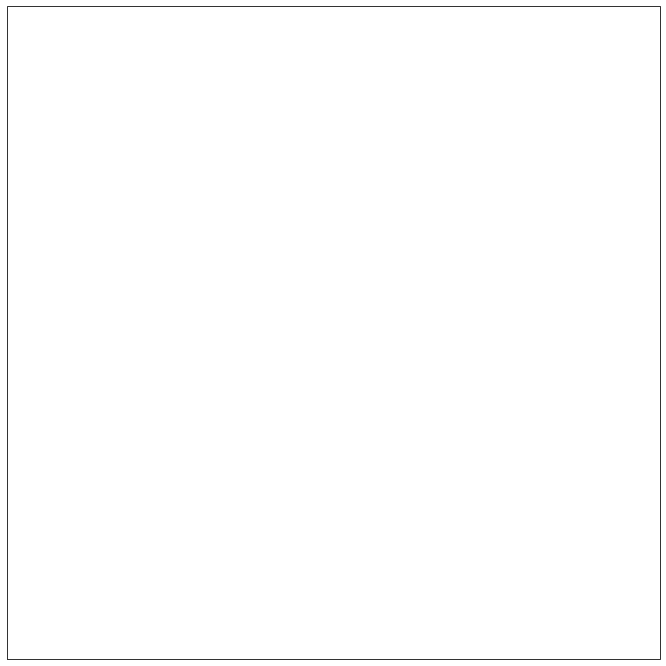

In [2]:

## Set up the figure and axis, cartopy style
fig = plt.figure(figsize=(12,12))
MAP_BOUNDS = [-96.5, -98.5, 35.5, 37.5]

# Argh, this adjusts the scaling in lat and long, not in distance
#MAP_CENTER = [-97.5,36.5]
#MAP_RANGE = 2
#MAP_BOUNDS[0] = MAP_CENTER[0]-.5*MAP_RANGE
#MAP_BOUNDS[1] = MAP_CENTER[0]+.5*MAP_RANGE
#MAP_BOUNDS[2] = MAP_CENTER[1]-0.5*MAP_RANGE*(85/111)
#MAP_BOUNDS[3] = MAP_CENTER[1]+0.5*MAP_RANGE*(85/111)
#print(MAP_BOUNDS)
this_time = 0

ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=2)
ax1.set_extent(MAP_BOUNDS)

## Set up colorbar values
ticks = np.linspace(100,600,21)

# Filled-contour plots
im1 = ax1.contourf(longs[:,:], lats[:,:],   #change from previous version
                   ter[:,:], ticks, cmap='terrain')
#im1 = ax1.contourf(longs[this_time,:,:], lats[this_time,:,:],   #change from previous version
#                   ter[this_time,:,:], ticks, cmap='terrain')
#im2 = ax2.contourf(longs_wf[0,:,:], lats_wf[0,:,:], wspd_nwf[this_time,hub_height,:,:], ticks)

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
#cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
cbar = fig.colorbar(im1,  ticks=ticks, orientation="vertical")
cbar.set_label('Elevation [m]', fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title('Model Elevation with 2019 turbines',fontsize=18)
#ax1.set_title(pd.to_datetime(sd_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Coarse", fontsize=14)

#ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
#ax2.tick_params(labelsize=14)
#ax2.set_xlabel("Longitude", fontsize=14)
# ax2.set_ylabel("Latitude", fontsize=14)
#ax2.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Fine", fontsize=14)

ax1.scatter([desired_lon], [desired_lat], color='r')
ax1.scatter([turbine_lons], [turbine_lats], color='b')
#ax2.scatter([desired_lon], [desired_lat], color='r')
#ax2.scatter([-87.442085], [26.4], color='r')

#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("ModelElevation2019turbines.png")
#plt.savefig("ModelElevation2019turbines.pdf")

plt.show()

In [ ]:
# For reference only

#print(np.shape(power))
#print(np.max(power))

#print(np.shape(np.sum(power,axis=1))) # summing over axis=0 collapses time

#power_ts=np.sum(np.sum(power,axis=1),axis=1)/(1.e+6)


# Now read in all the wrfout files for all the simulations

In [ ]:
# No Wind Farm Case

WRF_DIRECTORY_NWF = "/pl/active/WRFLES_GAD/AWAKEN/06_June2018_NWF/"
WRF_FILES_NWF = [
        "wrfout_d02_2018-06-08_00:00:00", # ignore for spin-up
      #  "wrfout_d02_2018-06-08_16:40:00",
      #  "wrfout_d02_2018-06-08_17:10:00",
      #  "wrfout_d02_2018-06-09_09:10:00",
    #    "wrfout_d02_2018-06-10_00:10:00",
     #   "wrfout_d02_2018-06-10_16:50:00",
     #   "wrfout_d02_2018-06-10_17:10:00",
     #   "wrfout_d02_2018-06-11_09:10:00",
     #   "wrfout_d02_2018-06-12_01:50:00",
     #   "wrfout_d02_2018-06-12_09:10:00"
     #   "wrfout_d02_2018-06-13_01:50:00",
     #   "wrfout_d02_2018-06-13_09:10:00",
     #   "wrfout_d02_2018-06-14_01:50:00",
     #   "wrfout_d02_2018-06-14_09:10:00",
     #   "wrfout_d02_2018-06-15_01:50:00",
     #   "wrfout_d02_2018-06-15_09:10:00",
     #   "wrfout_d02_2018-06-16_01:50:00",
     #   "wrfout_d02_2018-06-16_09:10:00",
     #   "wrfout_d02_2018-06-17_01:50:00",
     #   "wrfout_d02_2018-06-17_08:10:00",
     #   "wrfout_d02_2018-06-18_00:50:00",
     #   "wrfout_d02_2018-06-18_08:10:00",
     #   "wrfout_d02_2018-06-19_00:50:00",
     #   "wrfout_d02_2018-06-19_07:10:00",
     #   "wrfout_d02_2018-06-19_23:50:00"
                ]
#print(WRF_FILES_NWF)

_WRF_FILES_NWF = [os.path.abspath(
    os.path.join(WRF_DIRECTORY_NWF, f)) for f in WRF_FILES_NWF]

# Check that the WRF files exist
try:
    for f in _WRF_FILES_NWF:
        if not os.path.exists(f):
            raise ValueError("{} does not exist. "
                "Check for typos or incorrect directory.".format(f))
except ValueError as e:
    # Try downloading then check again
    os.system("git submodule init")
    os.system("git submodule update")
    os.system("GIT_DIR={}/.git git checkout -- .".format(WRF_DIRECTORY_NWF))
    for f in _WRF_FILES_NWF:
        if not os.path.exists(f):
             raise e

# Create functions so that the WRF files only need
# to be specified using the WRF_FILES global above
def single_wrf_file_nwf():
    global _WRF_FILES_NWF
    return _WRF_FILES_NWF[0]

def multiple_wrf_files_nwf():
    global _WRF_FILES_NWF
    return _WRF_FILES_NWF


file_paths_nwf = multiple_wrf_files_nwf()

wrf_files_nwf = [Dataset(f) for f in file_paths_nwf]

print('Done defining the NWF datafiles')

#Read in the wind-farm files with 2019 turbines

WRF_DIRECTORY_AWF = "/pl/active/WRFLES_GAD/AWAKEN/07_June2018_AWF/"
WRF_FILES_AWF = [
        "wrfout_d02_2018-06-08_00:00:00", # ignore for spin-up
     #   "wrfout_d02_2018-06-08_16:40:00",
      #  "wrfout_d02_2018-06-08_17:10:00",
      #  "wrfout_d02_2018-06-09_09:10:00",
     #   "wrfout_d02_2018-06-09_23:10:00",
    #    "wrfout_d02_2018-06-10_15:50:00",
    #    "wrfout_d02_2018-06-10_16:10:00",
    #    "wrfout_d02_2018-06-11_08:50:00",
    #    "wrfout_d02_2018-06-11_16:10:00",
    #    "wrfout_d02_2018-06-12_08:50:00",
    #    "wrfout_d02_2018-06-12_16:10:00",
    #    "wrfout_d02_2018-06-13_08:50:00",
    #    "wrfout_d02_2018-06-13_16:10:00",
    #    "wrfout_d02_2018-06-14_08:50:00",
    #    "wrfout_d02_2018-06-14_16:10:00",
    #    "wrfout_d02_2018-06-15_08:50:00",
    #    "wrfout_d02_2018-06-15_16:10:00",
    #    "wrfout_d02_2018-06-16_08:50:00",
    #    "wrfout_d02_2018-06-16_16:10:00",
    #    "wrfout_d02_2018-06-17_08:50:00",
    #    "wrfout_d02_2018-06-17_16:10:00",
    #    "wrfout_d02_2018-06-18_08:50:00",
    #    "wrfout_d02_2018-06-18_16:10:00",
    #    "wrfout_d02_2018-06-19_08:50:00",
    #    "wrfout_d02_2018-06-19_16:10:00"
                ]
#print(WRF_FILES_AWF)

_WRF_FILES_AWF = [os.path.abspath(
    os.path.join(WRF_DIRECTORY_AWF, f)) for f in WRF_FILES_AWF]

# Check that the WRF files exist
try:
    for f in _WRF_FILES_AWF:
        if not os.path.exists(f):
            raise ValueError("{} does not exist. "
                "Check for typos or incorrect directory.".format(f))
except ValueError as e:
    # Try downloading then check again
    os.system("git submodule init")
    os.system("git submodule update")
    os.system("GIT_DIR={}/.git git checkout -- .".format(WRF_DIRECTORY_AWF))
    for f in _WRF_FILES_AWF:
        if not os.path.exists(f):
             raise e
                
# Create functions so that the WRF files only need
# to be specified using the WRF_FILES global above
def single_wrf_file_awf():
    global _WRF_FILES_AWF
    return _WRF_FILES_AWF[0]

def multiple_wrf_files_awf():
    global _WRF_FILES_AWF
    return _WRF_FILES_AWF


file_paths_awf = multiple_wrf_files_awf()

wrf_files_awf = [Dataset(f) for f in file_paths_awf]

print('Done defining the AWF files')

In [ ]:
print('Starting to read in lats/longs')

lats = getvar(wrf_files_awf, "lat", timeidx=ALL_TIMES, method='cat')
longs = getvar(wrf_files_awf, "lon", timeidx=ALL_TIMES, method='cat')

print('Done reading in lats/longs')
print(np.shape(lats))
print(np.shape(longs))

lats = lats[0,:,:]
longs = longs[0,:,:]
print(np.shape(lats))
print(np.shape(longs))


In [ ]:
times_nwf = getvar(wrf_files_nwf, "times", timeidx=ALL_TIMES, method='cat')
times_awf = getvar(wrf_files_awf, "times", timeidx=ALL_TIMES, method='cat')

print(np.shape(times_nwf))
print(np.shape(times_awf))
print('Done with times')

In [ ]:
# How to deal with redundant times?

In [ ]:
winds_nwf = getvar(wrf_files_nwf, "uvmet_wspd_wdir", timeidx=ALL_TIMES, method='cat')
wspd_nwf = winds_nwf[0,:,:,:,:]
wdir_nwf = winds_nwf[1,:,:,:,:]

winds_nwf = 0. #clear the memory
print(np.shape(wspd_nwf))

max_height_index = 12
#Reduce the number of vertical levels that we're keeping
wspd_nwf = wspd_nwf[:,0:max_height_index,:,:]
wdir_nwf = wdir_nwf[:,0:max_height_index,:,:]
print(np.shape(wspd_nwf))

In [ ]:
height_agl = getvar(wrf_files_nwf, "height_agl", timeidx=ALL_TIMES, method='cat')
print(np.shape(height_agl))
height_agl = height_agl[:,0:max_height_index,:,:]

In [ ]:
ter = getvar(wrf_files_nwf, "ter", timeidx=ALL_TIMES, method='cat')
print(np.shape(ter))

In [ ]:
winds_awf = getvar(wrf_files_awf, "uvmet_wspd_wdir", timeidx=ALL_TIMES, method='cat')
wspd_awf = winds_awf[0,:,0:max_height_index,:,:]
wdir_awf = winds_awf[1,:,0:max_height_index,:,:]

winds_awf = 0. #clear the memory


In [ ]:
uv_winds_nwf = getvar(wrf_files_nwf, "uvmet", timeidx=ALL_TIMES, method='cat')
u_nwf = uv_winds_nwf[0,:,0:max_height_index,:,:]
v_nwf = uv_winds_nwf[1,:,0:max_height_index,:,:]
uv_winds_nwf = 0. #clear the memory

In [ ]:
uv_winds_awf = getvar(wrf_files_awf, "uvmet", timeidx=ALL_TIMES, method='cat')

u_awf = uv_winds_awf[0,:,0:max_height_index,:,:]
v_awf = uv_winds_awf[1,:,0:max_height_index,:,:]

print('Done getting the winds, including wind speed, u, v')


In [ ]:
power_awf = getvar(wrf_files_awf, "POWER", timeidx=ALL_TIMES, method='cat')
print(np.shape(power_awf))

In [ ]:
power_wf_ts=np.sum(np.sum(power_awf,axis=1),axis=1)/(1.e+6)


In [ ]:
#Plot a time series of total power

#print(np.max(power_ts))
#print(np.shape(power_ts))

fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.plot(times_awf,power_wf_ts, label='2019 turbines')

ax.set_xlabel("UTC Time", fontsize=14)
ax.set_ylabel("Power [MW]", fontsize=14)
ax.set_title('Total power production from all 2-MW turbines')
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)

# Format the x-axis labels nicely
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%D %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.gcf().subplots_adjust(bottom=0.3)
#plt.savefig("TotalPowerTimeseries.pdf")

plt.show()

In [ ]:
# Find the ARM lidar location

desired_lon = -97.485
desired_lat = 36.605

#desired_lon = -97.75
#desired_lat = 36.25

#desired_lon = -98
#desired_lat = 36

#calculate the distance from the cell center of all cells to the BAO. The
#indices with the minimum distance are the right indices to use.


#what is the closest location in the big domain?
km_lon = 85 #at 25.89 N, 100 km at 40 deg N, 85 km per degree of longitude -- should really use a projection here
km_lat = 111 # 111 km per degree of latitude

dist = np.sqrt(np.square(abs(km_lon*(longs[:,:] - desired_lon))) 
                    + np.square(abs(km_lat*(lats[:,:] - desired_lat))))
ind_max_s = np.unravel_index(np.argmin(dist, axis=None), dist.shape)

print(ind_max_s)
print(longs[ind_max_s[0],ind_max_s[1]].values)
print(lats[ind_max_s[0],ind_max_s[1]].values)

site_label = str(lats[ind_max_s[0],ind_max_s[1]].values)+', '+str(longs[ind_max_s[0],ind_max_s[1]].values)
print(site_label)

In [ ]:
print(np.shape(height_agl))
#print(height_agl[0,:,ind_max_s[0],ind_max_s[1]])
hub_height = 6
print(str(height_agl[0,hub_height,ind_max_s[0],ind_max_s[1]].values))

In [ ]:

#Get the time series of wind speed at hub height at ARM lidar location

fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.plot(times_awf,wspd_awf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF')
ax.plot(times_nwf,wspd_nwf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='NWF')

ax.set_xlabel("UTC Time", fontsize=14)
ax.set_ylabel("HH Wind Speed [m s-1] \n at "+site_label, fontsize=14)
ax.set_ylim(0,16)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)

# Format the x-axis labels nicely
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%D %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.gcf().subplots_adjust(bottom=0.3)


#plt.savefig("ARMWindSpeedTimeseries.pdf")

plt.show()

In [ ]:
#print(times_awf.values)
print(np.shape(times_awf))
idx = pd.Index(times_awf.values)
test = idx.unique
print(test)
print(np.shape(test))

In [ ]:

#Get the time series of wind speed at hub height at ARM lidar location

#ws_deficit = wspd_awf[0:190]-wspd_nwf[0:190]

fig, ax = plt.subplots(3, 1, figsize=(8,10))

ax[0].plot(times_awf,wspd_awf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF2019')
ax[0].plot(times_nwf,wspd_nwf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='NWF')
#ax.plot(times,wspd_wf[:,hub_height,0,0])
#ax.plot(times,wspd_nwf[:,hub_height,0,0])

ax[1].plot(times_awf,wdir_awf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF2019')
ax[1].plot(times_nwf,wdir_nwf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='NWF')

ax[2].plot(times_awf,wspd_awf[:,hub_height,ind_max_s[0],ind_max_s[1]]-wspd_nwf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF2019')


ax[2].set_xlabel("UTC Time", fontsize=14)
ax[0].set_ylabel("HH Wind \n Speed [m s-1] \n  ", fontsize=14)
ax[1].set_ylabel("HH Wind \n Direction [deg] \n at "+site_label, fontsize=14)
ax[2].set_ylabel("HH Wind \n Spd Deficit [m s-1] \n   ", fontsize=14)
ax[0].set_ylim(0,16)
ax[1].set_ylim(0,360)
ax[2].set_ylim(-3,0.1)

ax[0].tick_params(labelsize=12)
ax[1].tick_params(labelsize=12)
ax[2].tick_params(labelsize=12)
ax[1].legend(fontsize=12)
ax[2].legend(fontsize=12)

# Format the x-axis labels nicely

plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%D %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.gcf().subplots_adjust(bottom=0.3)


#plt.savefig("ARMWindSpeedDirTimeseries.pdf")

plt.show()

# Plot a spatial map of the winds from each simulation at a given time.

In [ ]:
this_time = 35
#print(wspd_wf[this_time,hub_height,ind_max_s[0],ind_max_s[1]].values)
#print(wspd_nwf[this_time,hub_height,ind_max_s[0],ind_max_s[1]].values)

#print(np.shape(longs_wf))
#print(np.max(wspd_nwf[this_time,hub_height,:,:]))
#print(times[this_time].values)
print(np.shape(longs))
print(np.shape(lats))
print(np.shape(wspd_awf))
print(hub_height)
print(this_time)
print(np.shape(wspd_awf[this_time,hub_height,:,:]))
print(np.shape(longs[:,:]))
print(np.shape(longs[:,:]))
print(np.shape(lats[:,:]))
print(np.shape(wspd_awf[this_time,hub_height,:,:]))


In [ ]:
this_time=70
print(wdir_awf[this_time,hub_height,150,150])
### Visualize variable of interest
## Set up the figure and axis, cartopy style
fig = plt.figure(figsize=(8,5))

MAP_BOUNDS = [min_lon, max_lon, min_lat, max_lat]

#MAP_BOUNDS_WF = [-102, -96, 34, 40]
MAP_BOUNDS_WF = [-96.5, -98.5, 35.5, 37.5]


# Left plot
ax1 = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=2)
ax1.set_extent(MAP_BOUNDS_WF)

# Right plot
ax2 = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=2)
ax2.set_extent(MAP_BOUNDS_WF)

## Set up colorbar values
ticks = np.linspace(0,20,11)
ter_ticks = np.linspace(200,1200,21)

# Filled-contour plots
im1 = ax1.contourf(longs[:,:], lats[:,:], wspd_awf[this_time,hub_height,:,:], ticks)
im2 = ax2.contourf(longs[:,:], lats[:,:], wspd_nwf[this_time,hub_height,:,:], ticks)
#im2 = ax2.contourf(longs_wf[0,:,:], lats_wf[0,:,:], ter[this_time,:,:], ter_ticks)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
cbar.set_label('Hub-height Wind Speed [m/s]', fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
title_text = 'Winds with WF at \n'+str(times_awf[this_time].values)[0:10]+'_'+str(times_awf[this_time].values)[11:16]
ax1.set_title(title_text)
#ax1.set_title(pd.to_datetime(sd_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Coarse", fontsize=14)

ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Longitude", fontsize=14)
title_text = 'Winds w/out WF at \n'+str(times_nwf[this_time].values)[0:10]+'_'+str(times_nwf[this_time].values)[11:16]
ax2.set_title(title_text)

# ax2.set_ylabel("Latitude", fontsize=14)
#ax2.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Fine", fontsize=14)

ax1.scatter([desired_lon], [desired_lat], color='r')
ax2.scatter([desired_lon], [desired_lat], color='r')
#ax2.scatter([-87.442085], [26.4], color='r')

ax1.scatter([turbine_lons], [turbine_lats], color='b')
ax2.scatter([turbine_lons], [turbine_lats], color='b')

plt.gcf().subplots_adjust(bottom=0.25)
#plt.savefig("contours.png")
#plt.savefig("WindSpeedContours.pdf")

plt.show()

In [ ]:

## Visualize variable of interest


## Set up the figure and axis, cartopy style
fig = plt.figure(figsize=(12,12))
MAP_BOUNDS_WF = [-96.5, -98.5, 35.5, 37.5]

ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=2)
ax1.set_extent(MAP_BOUNDS_WF)

## Set up colorbar values
ticks = np.linspace(100,600,21)

# Filled-contour plots
im1 = ax1.contourf(longs[:,:], lats[:,:],
                   ter[this_time,:,:], ticks, cmap='terrain')
#im2 = ax2.contourf(longs_wf[0,:,:], lats_wf[0,:,:], wspd_nwf[this_time,hub_height,:,:], ticks)

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
#cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
cbar = fig.colorbar(im1,  ticks=ticks, orientation="vertical")
cbar.set_label('Elevation [m]', fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title('Model Elevation',fontsize=18)
#ax1.set_title(pd.to_datetime(sd_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Coarse", fontsize=14)

#ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
#ax2.tick_params(labelsize=14)
#ax2.set_xlabel("Longitude", fontsize=14)
# ax2.set_ylabel("Latitude", fontsize=14)
#ax2.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Fine", fontsize=14)

ax1.scatter([desired_lon], [desired_lat], color='r')
ax1.scatter([turbine_lons], [turbine_lats], color='b')
#ax2.scatter([desired_lon], [desired_lat], color='r')
#ax2.scatter([-87.442085], [26.4], color='r')

#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("ModelElevation.png")
#plt.savefig("ModelElevation.pdf")

plt.show()

In [ ]:
print(this_time)
print(np.shape(wspd_awf))
print(np.shape(wspd_nwf))

In [ ]:
this_time=20
this_time = 35

## Visualize variable of interest

ws_deficit = wspd_awf-wspd_nwf

## Set up the figure and axis, cartopy style
fig = plt.figure(figsize=(12,12))
MAP_BOUNDS_WF = [-96.5, -98.5, 35.5, 37.5]

ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=2)
ax1.set_extent(MAP_BOUNDS_WF)

## Set up colorbar values
ticks = np.linspace(-2.4,-0.4,11)
#ticks = np.linspace(-2.4,+2.4,11)

# Filled-contour plots
im1 = ax1.contourf(longs[:,:], lats[:,:],
                   ws_deficit[this_time,hub_height,:,:],
                   #wspd_awf[this_time,hub_height,:,:]-
                   #wspd_nwf[this_time,hub_height,:,:], 
                   ticks, cmap='magma')
#im2 = ax2.contourf(longs_wf[0,:,:], lats_wf[0,:,:], wspd_nwf[this_time,hub_height,:,:], ticks)

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
#cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
cbar = fig.colorbar(im1,  ticks=ticks, orientation="vertical")
cbar.set_label('Hub-height Wind Speed WF-NWF [m/s]', fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title(times_awf[this_time].values,fontsize=14)
#ax1.set_title(pd.to_datetime(sd_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Coarse", fontsize=14)

#ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
#ax2.tick_params(labelsize=14)
#ax2.set_xlabel("Longitude", fontsize=14)
# ax2.set_ylabel("Latitude", fontsize=14)
#ax2.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Fine", fontsize=14)

ax1.scatter([desired_lon], [desired_lat], color='r')
ax1.scatter([turbine_lons], [turbine_lats], color='b')
#ax2.scatter([desired_lon], [desired_lat], color='r')
#ax2.scatter([-87.442085], [26.4], color='r')

#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("WakeContoursOneTime.png")
#plt.savefig("WakeContoursOneTime.pdf")

plt.show()

# Animate using wake maps

In [ ]:

num_frames = wspd_nwf.shape[0]

print((num_frames))

In [ ]:
print(str(times_nwf[1].values)[0:10]+'_'+str(times_nwf[1].values)[11:16])

In [ ]:
for t in np.arange(0,num_frames):    
    #print(times_nwf[t].values)
    pathout='Wake'+str(times_nwf[t].values)[0:10]+'_'+str(times_nwf[t].values)[11:13]+'UTC'
    #print(pathout)

# Wake deficit map

In [ ]:
#print(np.shape(ws_deficit[:,hub_height,:,:]))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

for t in np.arange(3,num_frames):    
    print(times_awf[t].values)
    #print(np.shape(ws_deficit[t,hub_height,:,:]))
    #print(np.min(ws_deficit[t,hub_height,:,:]).values)
    #print(np.max(ws_deficit[t,hub_height,:,:]).values)
    time_label=str(times_awf[t].values)[0:10]+'_'+str(times_awf[t].values)[11:13]+str(times_awf[t].values)[14:16]+'UTC'
    pathout='Wake'+time_label
    print(pathout)
    fig = plt.figure(figsize=(12,12))
    MAP_BOUNDS_WF = [-96.5, -98.5, 35.5, 37.5]
#    MAP_BOUNDS_WF = [-98, -97, 36, 37]
#   MAP_BOUNDS_WF = [-95.5, -99.5, 34.5, 38.5]

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1.add_feature(states_provinces, edgecolor='gray')

    ## Set up colorbar values
    ticks = np.linspace(-3,-0.3,11)
    #ticks = np.linspace(-2.4,+2.4,11)

    # Filled-contour plots
    #im1 = ax1.contourf(longs[0,:,:], lats[0,:,:],
     #              ws_deficit[t,hub_height,:,:], ticks, cmap='magma')
    
    im1 = ax1.contourf(longs[:,:], lats[:,:],
                    ws_deficit[t,hub_height,:,:],
                   #wspd_awf[this_time,hub_height,:,:]-
                   #wspd_nwf[this_time,hub_height,:,:], 
                   #wspd_awf[t,hub_height,:,:]-
                   #wspd_nwf[t,hub_height,:,:], 
                   ticks, cmap='magma')


#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
#cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
    cbar = fig.colorbar(im1,  ticks=ticks, orientation="vertical")
    cbar.set_label('Hub-height Wind Speed WF-NWF [m/s]', fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    ax1.xaxis.set_visible(True)
    ax1.yaxis.set_visible(True)
    ax1.tick_params(labelsize=14)
    ax1.set_xlabel("Longitude", fontsize=16)
    ax1.set_ylabel("Latitude", fontsize=16)
    ax1.set_title(time_label,fontsize=16)
#ax1.set_title(pd.to_datetime(sd_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Coarse", fontsize=14)

#ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
#ax2.tick_params(labelsize=14)
#ax2.set_xlabel("Longitude", fontsize=14)
# ax2.set_ylabel("Latitude", fontsize=14)
#ax2.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Fine", fontsize=14)

    ax1.scatter([desired_lon], [desired_lat], color='r')
    ax1.scatter([turbine_lons], [turbine_lats], color='b')
    

    # plot wind barbs
#    Urot, Vrot = m.rotate_vector(u_wf[t,ml,:,:], v_wf[t,ml,:,:], lons, lats)
    
    # convert m/s to kts
#    u_kts = Urot * 1.94384449
#    v_kts = Vrot * 1.94384449
    
    # thin grid for plotting
#    u_plot = u_kts[::stag,::stag]
#    v_plot = v_kts[::stag,::stag]
#    x_plot = 0.5*(x[:,1:] + x[:,:-1])[::stag,::stag]
#    y_plot = 0.5*(y[1:,:] + y[:-1,:])[::stag,::stag]
    
    # plot wind barbs over map
#    m.barbs(x_plot[1:,1:], y_plot[1:,2:], u_plot[1:,2:], v_plot[1:,2:], length=7,
#            barbcolor='k', flagcolor='k', linewidth=0.5)
    
    # plot wind turbines
#    x_farm, y_farm = m(turbine_lons.values, turbine_lats.values)
#    m.plot(x_farm, y_farm, '.', ms=2, c='k', label='Turbines')
       
#    cb = plt.colorbar(CS, format='%.1f', pad=0.05, extend='both')
#    cb.set_label(r'Wind speed deficit (m s$^{-1}$)', fontsize=cb_fs, labelpad=-80)
#    cb.ax.tick_params(labelsize=tk_fs) 
#    plt.tick_params(axis='both', which='major', labelsize=tk_fs)
    
#    plt.text(0.03, 0.93, 'time here', fontsize=cb_fs+2, transform=ax.transAxes,
#             bbox=dict(facecolor='none', edgecolor='none', alpha=0.8))
    #plt.title('', fontsize=lb_fs)
    
#    m.drawmapscale(-93.84, 41.88, -93, 41, 50, barstyle='fancy', 
#           yoffset=1800, units='km', fontsize=12, fillcolor1='w', fillcolor2='0.1',
#           zorder=10)
    
    #plt.savefig(pathout+'.png', dpi=200, bbox_inches='tight')
    #plt.savefig(pathout+'.pdf', bbox_inches='tight')


#plt.savefig("WakeContoursOneTime.png")
#plt.savefig("WakeContoursOneTime.pdf")

    plt.show()
    
# And then use convert -delay 30 -loop 0 Wake2012*png out.gif
os.system('convert -delay 30 -loop 0 Wake2012*png Wake.gif')

In [ ]:
print(np.shape(ws_deficit[:,hub_height,:,:]))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

for t in np.arange(3,num_frames):    
    print(times[t].values)
    print(np.shape(ws_deficit2016[t,hub_height,:,:]))
    print(np.min(ws_deficit2016[t,hub_height,:,:]).values)
    print(np.max(ws_deficit2016[t,hub_height,:,:]).values)
    time_label=str(times[t].values)[0:10]+'_'+str(times[t].values)[11:13]+'UTC'
    pathout='2016Wake'+time_label
    print(pathout)
    fig = plt.figure(figsize=(12,12))
    MAP_BOUNDS_WF = [-96.5, -98.5, 35.5, 37.5]
#    MAP_BOUNDS_WF = [-98, -97, 36, 37]
#   MAP_BOUNDS_WF = [-95.5, -99.5, 34.5, 38.5]

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1.add_feature(states_provinces, edgecolor='gray')

    ## Set up colorbar values
    ticks = np.linspace(-2.4,-0.3,11)
    #ticks = np.linspace(-2.4,+2.4,11)

    # Filled-contour plots
    im1 = ax1.contourf(longs[0,:,:], lats[0,:,:],
                   ws_deficit2016[t,hub_height,:,:], ticks, cmap='magma')

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
#cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
    cbar = fig.colorbar(im1,  ticks=ticks, orientation="vertical")
    cbar.set_label('Hub-height Wind Speed WF-NWF [m/s]', fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    ax1.xaxis.set_visible(True)
    ax1.yaxis.set_visible(True)
    ax1.tick_params(labelsize=14)
    ax1.set_xlabel("Longitude", fontsize=16)
    ax1.set_ylabel("Latitude", fontsize=16)
    ax1.set_title(time_label,fontsize=16)
#ax1.set_title(pd.to_datetime(sd_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Coarse", fontsize=14)

#ax2.xaxis.set_visible(True)
# ax2.yaxis.set_visible(True)
#ax2.tick_params(labelsize=14)
#ax2.set_xlabel("Longitude", fontsize=14)
# ax2.set_ylabel("Latitude", fontsize=14)
#ax2.set_title(pd.to_datetime(nd2_wsp['XTIME'].values[-1]).strftime('%Y-%m-%d %H:%M') + " - Fine", fontsize=14)

    ax1.scatter([desired_lon], [desired_lat], color='r')
    ax1.scatter([turbine_lons_2016], [turbine_lats_2016], color='b')

    # plot wind barbs
#    Urot, Vrot = m.rotate_vector(u_wf[t,ml,:,:], v_wf[t,ml,:,:], lons, lats)
    
    # convert m/s to kts
#    u_kts = Urot * 1.94384449
#    v_kts = Vrot * 1.94384449
    
    # thin grid for plotting
#    u_plot = u_kts[::stag,::stag]
#    v_plot = v_kts[::stag,::stag]
#    x_plot = 0.5*(x[:,1:] + x[:,:-1])[::stag,::stag]
#    y_plot = 0.5*(y[1:,:] + y[:-1,:])[::stag,::stag]
    
    # plot wind barbs over map
#    m.barbs(x_plot[1:,1:], y_plot[1:,2:], u_plot[1:,2:], v_plot[1:,2:], length=7,
#            barbcolor='k', flagcolor='k', linewidth=0.5)
    
    # plot wind turbines
#    x_farm, y_farm = m(turbine_lons.values, turbine_lats.values)
#    m.plot(x_farm, y_farm, '.', ms=2, c='k', label='Turbines')
       
#    cb = plt.colorbar(CS, format='%.1f', pad=0.05, extend='both')
#    cb.set_label(r'Wind speed deficit (m s$^{-1}$)', fontsize=cb_fs, labelpad=-80)
#    cb.ax.tick_params(labelsize=tk_fs) 
#    plt.tick_params(axis='both', which='major', labelsize=tk_fs)
    
#    plt.text(0.03, 0.93, 'time here', fontsize=cb_fs+2, transform=ax.transAxes,
#             bbox=dict(facecolor='none', edgecolor='none', alpha=0.8))
    #plt.title('', fontsize=lb_fs)
    
#    m.drawmapscale(-93.84, 41.88, -93, 41, 50, barstyle='fancy', 
#           yoffset=1800, units='km', fontsize=12, fillcolor1='w', fillcolor2='0.1',
#           zorder=10)
    
    #plt.savefig(pathout+'.png', dpi=200, bbox_inches='tight')
    #plt.savefig(pathout+'.pdf', bbox_inches='tight')


#plt.savefig("WakeContoursOneTime.png")
#plt.savefig("WakeContoursOneTime.pdf")

    plt.show()
    
# And then use convert -delay 30 -loop 0 Wake2012*png out.gif
os.system('convert -delay 60 -loop 0 2016Wake*png 2016Wake_4day.gif')

# Wind field without wakes

In [ ]:

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
#wsd_all = winds_wf[0,:,hub_height,:,:]-winds_nwf[0,:,hub_height,:,:]

for t in np.arange(3,num_frames):    
    print(times_nwf[t].values)
    time_label=str(times_nwf[t].values)[0:10]+'_'+str(times_nwf[t].values)[11:13]+str(times_nwf[t].values)[14:16]+' UTC'
    #pathout='Wake'+str(times[t].values)[0:10]+'_'+str(times[t].values)[11:13]+'UTC'
    pathout='NWF'+time_label
    print(pathout)
    fig = plt.figure(figsize=(12,12))
    MAP_BOUNDS_WF = [-96.5, -98.5, 35.5, 37.5]
#   MAP_BOUNDS_WF = [-95.5, -99.5, 34.5, 38.5]

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1.add_feature(states_provinces, edgecolor='gray')

    ## Set up colorbar values
    ticks = np.linspace(0,15,16)
    ticks = np.linspace(0,20,21)
    #ticks = np.linspace(-2.4,+2.4,11)

    # Filled-contour plots
    im1 = ax1.contourf(longs[:,:], lats[:,:], wspd_nwf[t,hub_height,:,:], ticks, cmap='viridis')

    cbar = fig.colorbar(im1,  ticks=ticks, orientation="vertical")
    cbar.set_label('Hub-height Wind Speed NWF [m/s]', fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    ax1.xaxis.set_visible(True)
    ax1.yaxis.set_visible(True)
    ax1.tick_params(labelsize=14)
    ax1.set_xlabel("Longitude", fontsize=16)
    ax1.set_ylabel("Latitude", fontsize=16)
    ax1.set_title(time_label,fontsize=16)

    ax1.scatter([desired_lon], [desired_lat], color='r')
    #ax1.scatter([turbine_lons], [turbine_lats], color='b')
    
    
    #plt.savefig(pathout+'.png', dpi=200, bbox_inches='tight')
    #plt.savefig(pathout+'.pdf', bbox_inches='tight')


#plt.savefig("WakeContoursOneTime.png")
#plt.savefig("WakeContoursOneTime.pdf")

    #plt.show()
    
# And then use convert -delay 30 -loop 0 Wake2012*png out.gif
os.system('convert -delay 60 -loop 1 NWF2018*png NWF.gif')

# Wind farm with wakes

In [ ]:
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
#wsd_all = winds_wf[0,:,hub_height,:,:]-winds_nwf[0,:,hub_height,:,:]

#print(np.shape(wspd_wf[:,hub_height,:,:]))

for t in np.arange(3,num_frames):    
    print(times_awf[t].values)
    time_label=str(times_awf[t].values)[0:10]+'_'+str(times_awf[t].values)[11:13]+str(times_awf[t].values)[14:16]+'UTC'
    #pathout='Wake'+str(times[t].values)[0:10]+'_'+str(times[t].values)[11:13]+'UTC'
    pathout='WF'+time_label
    print(pathout)
    fig = plt.figure(figsize=(12,12))
    MAP_BOUNDS_WF = [-96.5, -98.5, 35.5, 37.5]
#   MAP_BOUNDS_WF = [-95.5, -99.5, 34.5, 38.5]

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1.add_feature(states_provinces, edgecolor='gray')

    ## Set up colorbar values
    ticks = np.linspace(0,15,16)    
    ticks = np.linspace(0,20,21)

    #ticks = np.linspace(-2.4,+2.4,11)

    # Filled-contour plots
    im1 = ax1.contourf(longs[:,:], lats[:,:], wspd_awf[t,hub_height,:,:], ticks, cmap='viridis')

    cbar = fig.colorbar(im1,  ticks=ticks, orientation="vertical")
    cbar.set_label('Hub-height Wind Speed WF [m/s]', fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    ax1.xaxis.set_visible(True)
    ax1.yaxis.set_visible(True)
    ax1.tick_params(labelsize=14)
    ax1.set_xlabel("Longitude", fontsize=16)
    ax1.set_ylabel("Latitude", fontsize=16)
    ax1.set_title(time_label,fontsize=16)

    ax1.scatter([desired_lon], [desired_lat], color='r')
    ax1.scatter([turbine_lons], [turbine_lats], color='b')
    
    
    #plt.savefig(pathout+'.png', dpi=200, bbox_inches='tight')
    #plt.savefig(pathout+'.pdf', bbox_inches='tight')


#plt.savefig("WakeContoursOneTime.png")
#plt.savefig("WakeContoursOneTime.pdf")

    #plt.show()
    
# And then use convert -delay 30 -loop 0 Wake2012*png out.gif
os.system('convert -delay 60 -loop 1 WF2018*png AWF.gif')

# Time series of power production?

In [ ]:


for t in np.arange(3,num_frames):    
    print(times_awf[t].values)
    time_label=str(times_awf[t].values)[0:10]+'_'+str(times_awf[t].values)[11:13]+str(times_awf[t].values)[14:16]+'UTC'
    #pathout='Wake'+str(times[t].values)[0:10]+'_'+str(times[t].values)[11:13]+'UTC'
    pathout='Power'+time_label
    print(pathout)
    
    fig, ax = plt.subplots(1, 1, figsize=(8,3))

    ax.plot(times_awf,power_wf_ts,label='2019 turbines')

    ax.set_xlabel("UTC Time", fontsize=14)
    ax.set_ylabel("Power [MW]", fontsize=14)
    ax.set_title('Total power production from all 2-MW turbines')
    ax.tick_params(labelsize=14)
    ax.legend(fontsize=14)
    ax.set_ylim(0,2700)
    
    ax.scatter(times_awf[t].values, power_wf_ts[t], color='r')
    #ax.scatter(times[t].values, power_wf2016_ts[t], color='r')

    # Format the x-axis labels nicely
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%D %H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.gcf().subplots_adjust(bottom=0.3)
    
    
    #plt.savefig(pathout+'.png', dpi=200, bbox_inches='tight')
    #plt.savefig(pathout+'.pdf', bbox_inches='tight')


#plt.savefig("WakeContoursOneTime.png")
#plt.savefig("WakeContoursOneTime.pdf")

    plt.show()
    
print('starting making animation')    
os.system('convert -delay 60 -loop 1 Power2018*png PowerAWF.gif')
print('finished making animation')    


In [ ]:

#Get the time series of wind speed at hub height at ARM lidar location



for t in np.arange(3,num_frames):  
    print(times_awf[t].values)
    time_label=str(times_awf[t].values)[0:10]+'_'+str(times_awf[t].values)[11:13]+str(times_awf[t].values)[14:16]+'UTC'
    #pathout='Wake'+str(times[t].values)[0:10]+'_'+str(times[t].values)[11:13]+'UTC'
    pathout='AllVariables'+time_label
    print(pathout)
    
    fig, ax = plt.subplots(3, 1, figsize=(8,10))

    ax[0].plot(times_awf,wspd_awf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF2019')
    #ax[0].plot(times,wspd_wf2016[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF2016')
    ax[0].plot(times_nwf,wspd_nwf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='NWF')
    ax[1].plot(times_awf,wdir_awf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF2019')
    #ax[1].plot(times,wdir_wf2016[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF2016')
    ax[1].plot(times_nwf,wdir_nwf[:,hub_height,ind_max_s[0],ind_max_s[1]],label='NWF')

    ax[2].plot(times_awf,ws_deficit[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF2019')
    #ax[2].plot(times,ws_deficit2016[:,hub_height,ind_max_s[0],ind_max_s[1]],label='WF2016')

    ax[2].set_xlabel("UTC Time", fontsize=14)
    ax[0].set_ylabel("HH Wind \n Speed [m s-1] \n  ", fontsize=14)
    ax[1].set_ylabel("HH Wind \n Direction [deg] \n at "+site_label, fontsize=14)
    ax[2].set_ylabel("HH Wind \n Spd Deficit [m s-1] \n   ", fontsize=14)
    ax[0].set_ylim(0,16)
    ax[1].set_ylim(0,360)
    ax[2].set_ylim(-3,0.1)

    ax[0].tick_params(labelsize=12)
    ax[1].tick_params(labelsize=12)
    ax[2].tick_params(labelsize=12)
    ax[1].legend(fontsize=12)
    ax[2].legend(fontsize=12)

    ax[0].scatter(times_awf[t].values, wspd_awf[t,hub_height,ind_max_s[0],ind_max_s[1]], color='r')
    ax[0].scatter(times_nwf[t].values, wspd_nwf[t,hub_height,ind_max_s[0],ind_max_s[1]], color='r')
    #ax[0].scatter(times[t].values, wspd_wf2016[t,hub_height,ind_max_s[0],ind_max_s[1]], color='r')
    
    ax[1].scatter(times_awf[t].values, wdir_awf[t,hub_height,ind_max_s[0],ind_max_s[1]], color='r')
    ax[1].scatter(times_nwf[t].values, wdir_nwf[t,hub_height,ind_max_s[0],ind_max_s[1]], color='r')
    #ax[1].scatter(times[t].values, wdir_wf2016[t,hub_height,ind_max_s[0],ind_max_s[1]], color='r')

    ax[2].scatter(times_awf[t].values, ws_deficit[t,hub_height,ind_max_s[0],ind_max_s[1]], color='r')
    #ax[2].scatter(times[t].values, ws_deficit2016[t,hub_height,ind_max_s[0],ind_max_s[1]], color='r')

# Format the x-axis labels nicely

    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%D %H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.gcf().subplots_adjust(bottom=0.3)


    
    #plt.savefig(pathout+'.png', dpi=200, bbox_inches='tight')
    #plt.savefig(pathout+'.pdf', bbox_inches='tight')


#plt.savefig("WakeContoursOneTime.png")
#plt.savefig("WakeContoursOneTime.pdf")

    plt.show()
    
print('starting making animation')    
os.system('convert -delay 60 -loop 1 AllVariables*png AllVariables.gif')
print('finished making animation') 

In [ ]:
# Read in the T2 data from WF and NWF
T2_nwf = getvar(wrf_files_nwf, "T2", timeidx=ALL_TIMES, method='cat')
T2_awf = getvar(wrf_files_awf, "T2", timeidx=ALL_TIMES, method='cat')
#T2_wf2016 = getvar(wrf_files_wf2016, "T2", timeidx=ALL_TIMES, method='cat')


# Plot the temperature difference

In [ ]:
print(np.shape(T2_nwf))

In [ ]:
T2_diff = T2_awf - T2_nwf
print(np.shape(T2_diff[:,:,:]))

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

for t in np.arange(3,num_frames):    
    print(times_awf[t].values)
    time_label=str(times_awf[t].values)[0:10]+'_'+str(times_awf[t].values)[11:13]+str(times_awf[t].values)[14:16]+'UTC'
    pathout='T2'+time_label
    print(pathout)
    fig = plt.figure(figsize=(12,12))
    MAP_BOUNDS_WF = [-96.5, -98.5, 35.5, 37.5]
#    MAP_BOUNDS_WF = [-98, -97, 36, 37]
#   MAP_BOUNDS_WF = [-95.5, -99.5, 34.5, 38.5]

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1 = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax1.coastlines(linewidth=2)
    ax1.set_extent(MAP_BOUNDS_WF)

    ax1.add_feature(states_provinces, edgecolor='gray')

    ## Set up colorbar values
    ticks = np.linspace(-3,+3,30)
    ticks = np.linspace(-2,+2,10)

    # Filled-contour plots
    im1 = ax1.contourf(longs[:,:], lats[:,:],
                   T2_diff[t,:,:], ticks, cmap='bwr')

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
#cbar = fig.colorbar(im1, cax=cbar_ax, ticks=ticks, orientation="horizontal")
#cbar_ax = fig.add_axes([0.1, 0.15, 0.7, 0.03])
    cbar = fig.colorbar(im1,  ticks=ticks, orientation="vertical")
    cbar.set_label('T2 AWF-NWF [K]', fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    ax1.xaxis.set_visible(True)
    ax1.yaxis.set_visible(True)
    ax1.tick_params(labelsize=14)
    ax1.set_xlabel("Longitude", fontsize=16)
    ax1.set_ylabel("Latitude", fontsize=16)
    ax1.set_title(time_label,fontsize=16)

    ax1.scatter([desired_lon], [desired_lat], color='r')
    ax1.scatter([turbine_lons], [turbine_lats], color='b')
    
    
    #plt.savefig(pathout+'.png', dpi=200, bbox_inches='tight')
    #plt.savefig(pathout+'.pdf', bbox_inches='tight')


#plt.savefig("WakeContoursOneTime.png")
#plt.savefig("WakeContoursOneTime.pdf")

    plt.show()
    
# And then use convert -delay 30 -loop 0 Wake2012*png out.gif
os.system('convert -delay 60 -loop 0 T22018*png T2Wake.gif')

# Nothing below here .... 

In [ ]:
import numpy
from matplotlib import pyplot, rc
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, ALL_TIMES)

print('done importing')

slp_all = getvar(wrf_files_wf, "slp", timeidx=ALL_TIMES)
print('done with slp') 
winds_nwf = getvar(wrf_files_nwf, "uvmet_wspd_wdir", timeidx=ALL_TIMES, method='cat')
winds_wf = getvar(wrf_files_wf, "uvmet_wspd_wdir", timeidx=ALL_TIMES, method='cat')
print('done with winds')

#winds_wf = getvar(wrf_files_wf, "uvmet10_wspd_wdir", timeidx=ALL_TIMES, method='cat')
#winds_nwf = getvar(wrf_files_nwf, "uvmet10_wspd_wdir", timeidx=ALL_TIMES, method='cat')

print(np.shape(winds_nwf), np.shape(winds_wf))


In [ ]:
print('testing')

In [ ]:
print('testing')
print(np.shape(winds_nwf), np.shape(winds_wf))


In [ ]:
#print(np.shape(winds_nwf))
wsd_all = winds_wf[0,:,hub_height,:,:]-winds_nwf[0,:,hub_height,:,:]

#ws_deficit_all = wspd_wf[:,hub_height,:,:]-wspd_nwf[:,hub_height,:,:]

# Get the cartopy projection object
cart_proj = get_cartopy(slp_all)
print(np.shape(wsd_all))
print(np.shape(slp_all))
print(np.min(wsd_all),np.max(wsd_all))
print(np.min(slp_all),np.max(slp_all))
print(hub_height)
num_frames = wsd_all.shape[0]

print(np.min(wsd_all[3,:,:]), np.max(wsd_all[3,:,:]))

In [ ]:
print(np.shape(cartopy_xlim(slp_all)))
print(cartopy_xlim(slp_all)[0]-cartopy_xlim(slp_all)[1])
print(cartopy_ylim(slp_all))
print(0.5*np.array(cartopy_xlim(slp_all)))
print(cartopy_ylim(slp_all))

In [ ]:

fig = pyplot.figure(figsize=(10,7.5))
ax_wsd = pyplot.axes(projection=cart_proj)

# Download and create the states, land, and oceans using cartopy features
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                                      name='admin_1_states_provinces_shp')
land = NaturalEarthFeature(category='physical', name='land', scale='50m',
                                    facecolor=COLORS['land'])
ocean = NaturalEarthFeature(category='physical', name='ocean', scale='50m',
                                     facecolor=COLORS['water'])

slp_levels = numpy.arange(1005,1040,2.5) 
wsd_levels = numpy.arange(-2.0,-0.2,.1) 

num_frames = wsd_all.shape[0]
# This function is called for each frame of the animation, where
# i is the frame index. Here is where the animation frames need 
# to be created.


def animate(i):
    ax_wsd.clear()
    slp = slp_all[i,:]
    wsd = wsd_all[i,:]
    #print(np.shape(slp),np.shape(wsd))
    #print(i,np.min(wsd),np.max(wsd))
    
    # Get the lat/lon coordinates
    lats, lons = latlon_coords(wsd)
    
    ax_wsd.add_feature(ocean)
    ax_wsd.add_feature(land)
    ax_wsd.add_feature(states, linewidth=.5, edgecolor="black")
    
    ax_wsd.scatter([desired_lon], [desired_lat], color='r')
    ax_wsd.scatter([turbine_lons], [turbine_lats], color='b')

    
    wsd_contours = ax_wsd.contour(to_np(lons), 
                                  to_np(lats), 
                                  to_np(wsd), 
                                  levels=wsd_levels,
                                  #to_np(slp), 
                                  #levels=slp_levels,
                                  cmap='magma',
                                  #colors="black", 
                                  zorder=5,
                                  transform=crs.PlateCarree()) 
    
    # Add contour labels for pressure
    #ax_wsd.clabel(wsd_contours, fmt="%i")
    ax_wsd.scatter([desired_lon], [desired_lat], color='r')
    ax_wsd.scatter([turbine_lons], [turbine_lats], color='b')

     
    # Set the map bounds
#    print(0.5*np.array(cartopy_xlim(slp_all)))

    ax_wsd.set_xlim(0.5*np.array(cartopy_xlim(slp)))
    ax_wsd.set_ylim(0.5*np.array(cartopy_ylim(slp)))
#    ax_wsd.set_ylim(cartopy_ylim(slp))
    ax_wsd.set_title((times[i].values)[0:9]+'  '+(times[i].values)[11:15],fontsize=14)

    
    # Add color bar
#    cbar = ax_wsd.colorbar(im1,  ticks=ticks, orientation="vertical")
#    cbar.set_label('Wind Speed NWF-WF [m/s]', fontsize=14)
#    cbar.ax_wsd.tick_params(labelsize=14)



    return ax_wsd

# Create the animation by supplying a figure, the animation object, the number of frames
# and an interval in milliseconds that is the delay between frames.
ani = FuncAnimation(fig, animate, num_frames, interval=500)

# To work with jupyter notebook, you need to use the HTML generated
# by the HTML function from the IPython.display package.
# If you change 'to_jshtml' to be 'to_html5_video', you will get an HTML5 video instead.

#HTML(ani.to_html5_video())
HTML(ani.to_jshtml())



In [ ]:

ws_deficit = wspd_wf-wspd_nwf

pathout = '/pl/active/ATOC_NWP/students/jlundqui/AWAKEN/'
timesteps = 49
ml = hub_height   # model level 80 m
stag = 3 # thin plotted wind barbs
vmin = -2
vmax = 0

# font sizes
cb_fs = 18
lb_fs = 22
tk_fs = 14
bx_fs = 20

# map setup
lllon = -98.5
lllat = 35
urlon = -96.5
urlat = 37
lat0 = 35
lon0 = -97.5
thresh = 500
res = 'l'     # l "low" for drafts, h "high" for final
proj = 'lcc'  # lambert conformal
parallels = np.arange(35,37,0.2)
meridians = np.arange(-99,-96,0.2) 

for t in np.arange(timesteps):    
    fig1 = plt.figure(figsize=[14,8])
    ax = fig1.add_subplot(111)
    
    m = Basemap(projection=proj, lat_0=lat0, lon_0=lon0,
        resolution = res, area_thresh = thresh,
        llcrnrlon=lllon, llcrnrlat=lllat,  
        urcrnrlon=urlon, urcrnrlat=urlat)   
    m.drawmapboundary()
    parallels = parallels
    meridians = meridians
    m.drawparallels(parallels,labels=[1,0,0,0],linewidth=0,fontsize=tk_fs,rotation=90)
    m.drawmeridians(meridians,labels=[0,0,0,1],linewidth=0,fontsize=tk_fs)
    
    # shift grid to account for pcolormesh plotting values at corner
    lon_shift = 0.5*(longs_wf[0,:,1:] + longs_wf[0,:,:-1])
    lat_shift = 0.5*(lats_wf[0,1:,:] + lats_wf[0,:-1,:])
    x, y = m(lon_shift[:-1,:], lat_shift[:,:-1])
    CS = m.pcolormesh(x, y, ws_deficit[t,ml,1:,1:], vmax=vmax, vmin=vmin,
                  cmap='magma', edgecolors='none', lw=0.1) 
    # plot wind barbs
    Urot, Vrot = m.rotate_vector(u_wf[t,ml,:,:], v_wf[t,ml,:,:], lons, lats)
    
    # convert m/s to kts
    u_kts = Urot * 1.94384449
    v_kts = Vrot * 1.94384449
    
    # thin grid for plotting
    u_plot = u_kts[::stag,::stag]
    v_plot = v_kts[::stag,::stag]
    x_plot = 0.5*(x[:,1:] + x[:,:-1])[::stag,::stag]
    y_plot = 0.5*(y[1:,:] + y[:-1,:])[::stag,::stag]
    
    # plot wind barbs over map
    m.barbs(x_plot[1:,1:], y_plot[1:,2:], u_plot[1:,2:], v_plot[1:,2:], length=7,
            barbcolor='k', flagcolor='k', linewidth=0.5)
    
    # plot wind turbines
    x_farm, y_farm = m(turbine_lons.values, turbine_lats.values)
    m.plot(x_farm, y_farm, '.', ms=2, c='k', label='Turbines')
       
    cb = plt.colorbar(CS, format='%.1f', pad=0.05, extend='both')
    cb.set_label(r'Wind speed deficit (m s$^{-1}$)', fontsize=cb_fs, labelpad=-80)
    cb.ax.tick_params(labelsize=tk_fs) 
    plt.tick_params(axis='both', which='major', labelsize=tk_fs)
    
    plt.text(0.03, 0.93, 'time here', fontsize=cb_fs+2, transform=ax.transAxes,
             bbox=dict(facecolor='none', edgecolor='none', alpha=0.8))
    #plt.title('', fontsize=lb_fs)
    
    m.drawmapscale(-93.84, 41.88, -93, 41, 50, barstyle='fancy', 
           yoffset=1800, units='km', fontsize=12, fillcolor1='w', fillcolor2='0.1',
           zorder=10)
    
    #plt.savefig(pathout+'.png', dpi=200, bbox_inches='tight')
    #plt.savefig(pathout+'.pdf', bbox_inches='tight')
#################################
    